## Demo (and testing)

### Setup required as this isn't a package just yet

In [1]:
# ensure notebook can import from local sticky directory
import sys
sys.path.append("D:/Projects/lazychart/src")

### Object oriented vs Functional appraoch

There are two ways to use this package:

1. Object oriented approach. You instantiate one or more instances of the StickyPlotter class and use them to control your plotting.

2. Functional approach. You call the package functions which are defined in the __init__.py file which instantiates the StickyPlotter class and passes your requests through for it to handle.

In [2]:
# object oriented approach
from lazychart import ChartMonkey

cm = ChartMonkey()
df = cm.example_data(n=1461)
df.head()

,date,user,sleep_hours,steps,alcohol,work_stress,nutrition,score,predicted_emotion,month,weekday
0,2021-08-14 23:24:40.856680,user39,6.651987,5688.783716,2,2.313749,5.068314,8.593897,Happy,2021-08,Saturday
1,2021-08-15 23:24:40.856680,user29,7.198558,6942.937849,3,4.208799,8.146145,9.696701,Happy,2021-08,Sunday
2,2021-08-16 23:24:40.856680,user15,5.565635,4095.907190,0,9.476706,7.504157,3.874251,Happy,2021-08,Monday
3,2021-08-17 23:24:40.856680,user43,7.581022,4956.492933,3,3.122092,10.000000,7.801262,Happy,2021-08,Tuesday
4,2021-08-18 23:24:40.856680,user8,5.475985,4373.712913,2,3.138230,7.752243,7.591253,Happy,2021-08,Wednesday


data generation notes/ideas
* try to balance out the predicted_emotion class, currently 100% happy
* make people sleep more on the weekends

library ideas
* custom sort order as list of values e.g. ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
* make the sort asc/desc default based on the sort type (values descending, labels ascending)

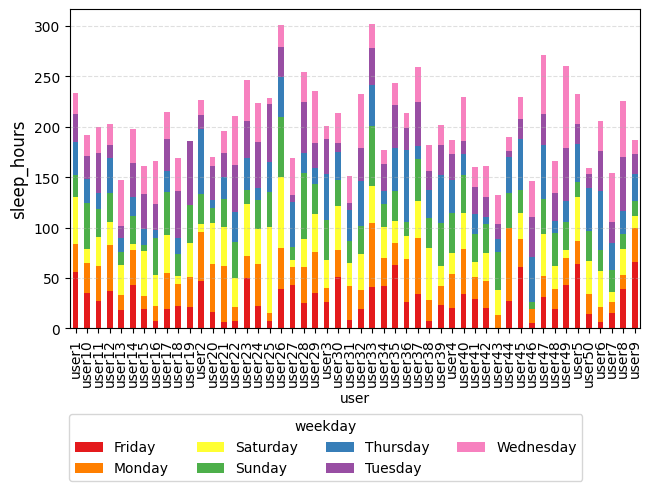

In [3]:
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', stacking='standard', legend='bottom')

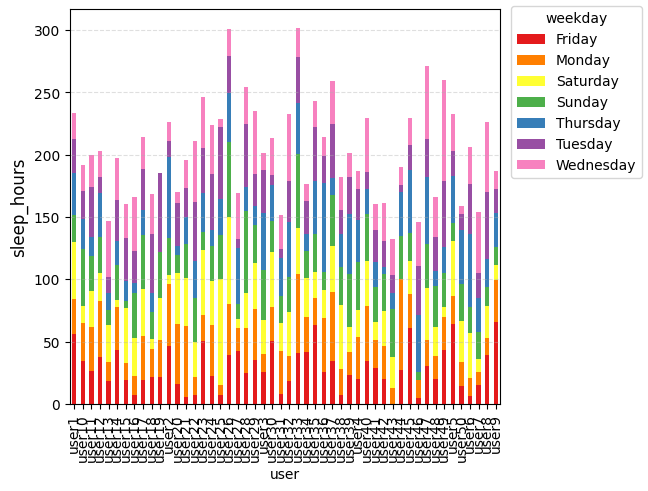

In [4]:
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', stacking='standard', legend='right')

In [5]:
### Long legend labels

weekday_mapping = {
    "Monday":    "Monday is the first day",
    "Tuesday":   "Tuesday is the second day",
    "Wednesday": "Wednesday is the third day",
    "Thursday":  "Thursday is the fourth day",
    "Friday":    "Friday is the fifth day",
    "Saturday":  "Saturday is the sixth day",
    "Sunday":    "Sunday is the seventh day"
}

# Apply mapping to create longer names
df['weekday_long'] = df['weekday'].map(weekday_mapping)

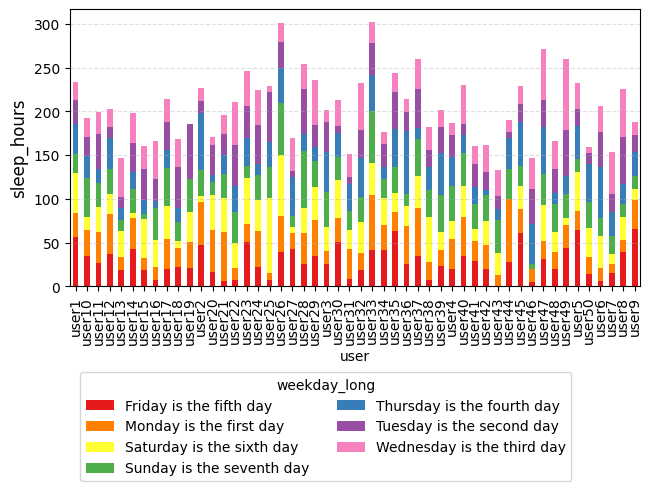

In [6]:
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday_long', stacking='standard', legend='bottom')

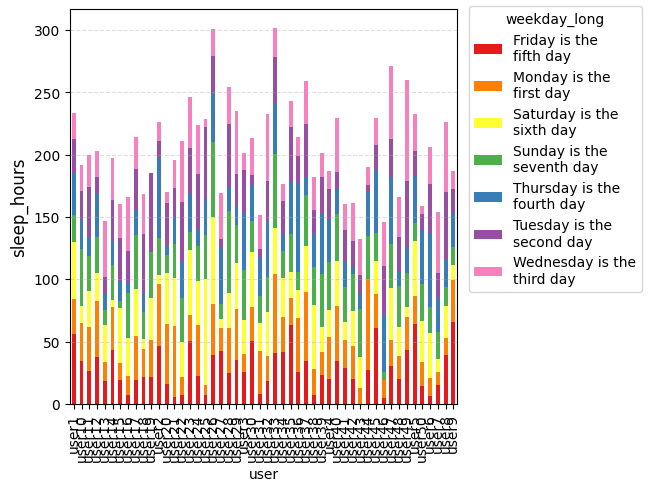

In [7]:
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday_long', stacking='standard', legend='right')

### Sticky arguments

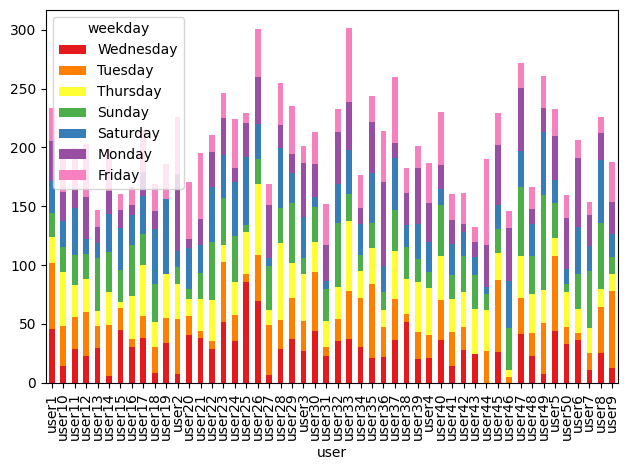

In [4]:
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', stacking='standard', sort_x_by='label', sort_x_desc=False, sticky=True)

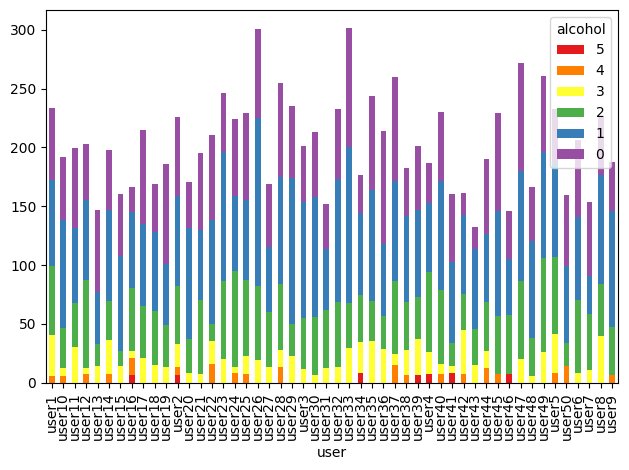

In [5]:
# no need to pass data, x, y etc
cm.bar(group_by='alcohol', sort_group_by='label')

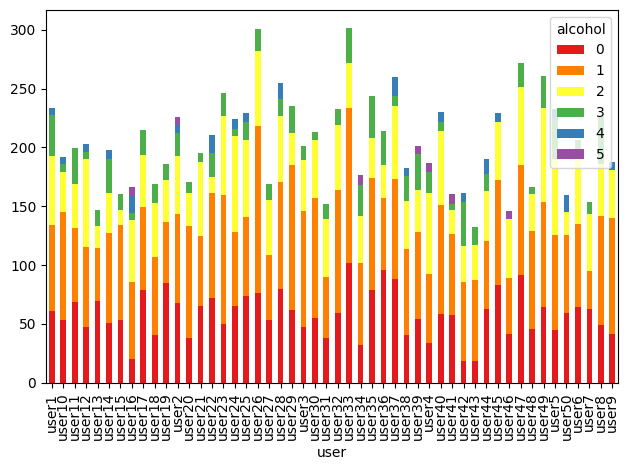

In [6]:
cm.bar(group_by='alcohol', sort_group_by='label', sort_group_desc=False)

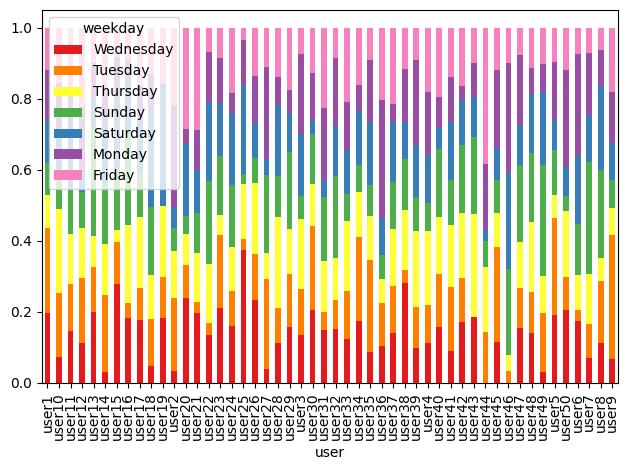

In [8]:
cm.bar(stacking='proportion')

### Colorblind or custom palettes

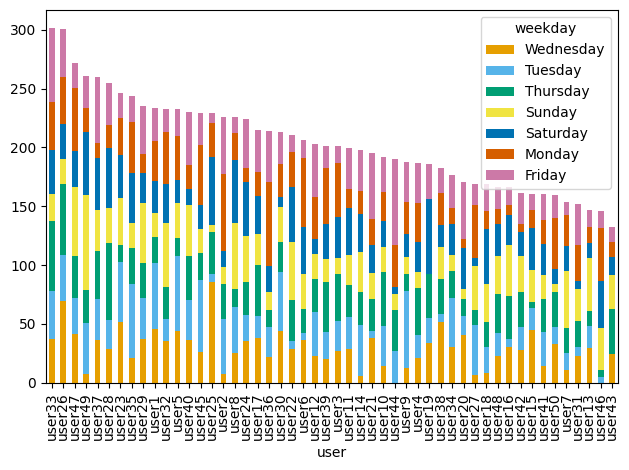

In [12]:
colorblind_cm = ChartMonkey(palette='colorblind')
colorblind_cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', stacking='standard')

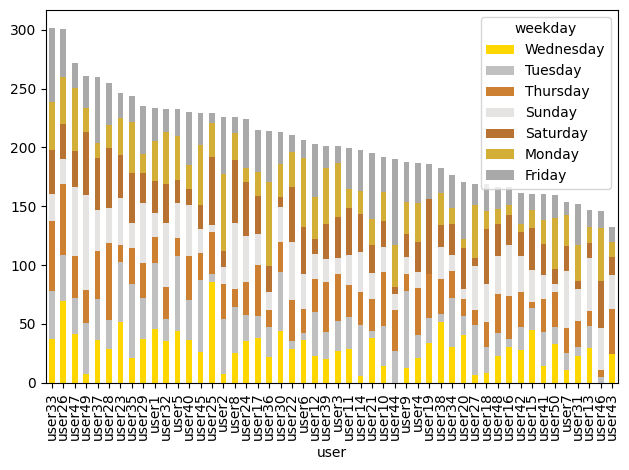

In [13]:
METALLIC_PALETTE = [
    '#FFD700',  # Gold
    '#C0C0C0',  # Silver
    '#CD7F32',  # Bronze
    '#E5E4E2',  # Platinum
    '#B87333',  # Copper
    '#D4AF37',  # Metallic Gold (Deep)
    '#A9A9A9',  # Gunmetal Gray
    '#B0C4DE',  # Steel Blue
    '#DA8A67',  # Rose Gold
    '#8C7853'   # Brass
]
custom_cm = ChartMonkey(palette=METALLIC_PALETTE)
custom_cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', stacking='standard')

In [15]:
# functional approach
from lazychart import bar

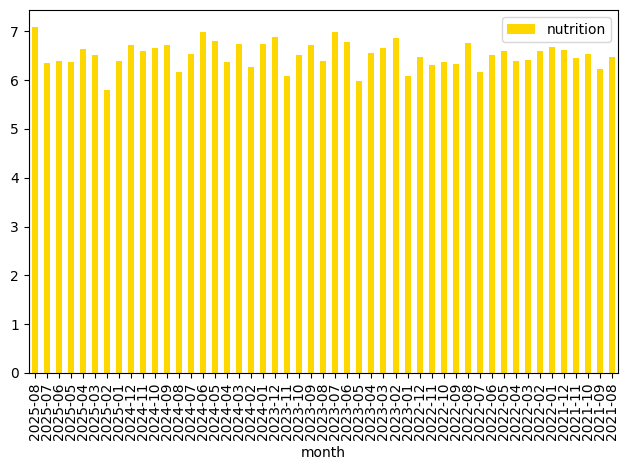

In [17]:
# investigate - tooltip not coming up
bar(data=df, x='month', y='nutrition', aggfunc='mean', sort_x_by='label')

# Early stuff - need to revisit

### Post processing

The default behaviour is to show the plot and return None to suppress other cell outputs. Pass show_plot=False to instead return fig, ax for post processing.

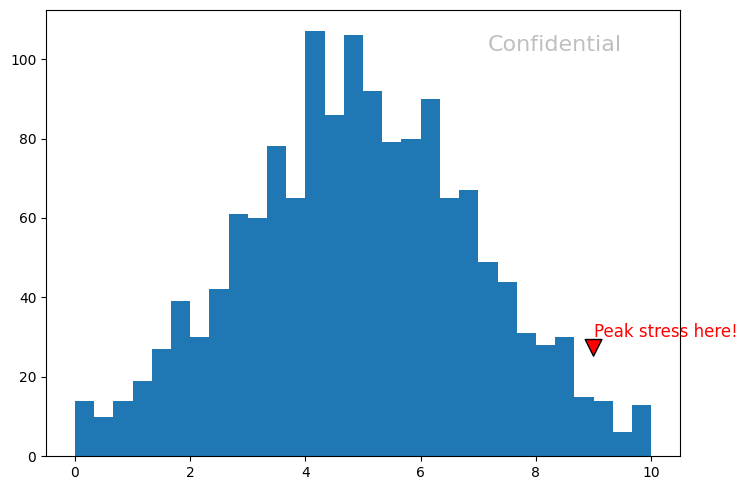

In [9]:
fig, ax = sticky.hist(data=df, x='work_stress', show_plot=False)

# Example: Add a custom annotation to the plot
ax.annotate(
    'Peak stress here!',
    xy=(9, 25), # point to annotate (arrow tip), in data coordinates
    xytext=(9, 30), # location of the annotation text, in data coordinates
    arrowprops=dict(facecolor='red', shrink=0.05), # arrow style
    fontsize=12, color='red' # text style
)

# Example: Add a watermark
fig.text(0.8, 0.9, 'Confidential', ha='center', va='center', fontsize=16, color='gray', alpha=0.5)

# Example: Save the figure with a custom DPI and tight bounding box
fig.savefig('demo_save.png', dpi=300, bbox_inches='tight')